In [1]:
# Cell 1: code by Giulio Ghirardo  
def fourier_series_coeff(f, T, N):
    """Calculates the first 2*N+1 Fourier series coeff. of a periodic function.

    Given a periodic, function f(t) with period T, this function returns the
    coefficients a0, {a1,a2,...},{b1,b2,...} such that:

    f(t) ~= a0/2+ sum_{k=1}^{N} ( a_k*cos(2*pi*k*t/T) + b_k*sin(2*pi*k*t/T) )
    
    Parameters
    ----------
    f : the periodic function, a callable like f(t)
    T : the period of the function f, so that f(0)==f(T)
    N_max : the function will return the first N_max + 1 Fourier coeff.

    Returns
    -------
    a0 : float
    a,b : numpy float arrays describing respectively the cosine and sine coeff.
    """
    # From Nyquist theorem we must use a sampling 
    # freq. larger than the maximum frequency you want to catch in the signal. 
    f_sample = 2 * N
    
    # We also need to use an integer sampling frequency, or the
    # points will not be equispaced between 0 and 1. We then add +2 to f_sample.
    t, dt = np.linspace(0, T, f_sample + 2, endpoint=False, retstep=True)
    y = np.fft.rfft(f) / t.size
    y *= 2
    return y[0].real, y[1:-1].real[0:N], -y[1:-1].imag[0:N]

In [2]:
# Cell 2: code by Giulio Ghirardo  
def series_real_coeff(a0, a, b, t, T):
    """calculates the Fourier series with period T at times t,
       from the real coeff. a0,a,b"""
    tmp = np.ones_like(t) * a0 / 2.
    for k, (ak, bk) in enumerate(zip(a, b)):
        tmp += ak * np.cos(2 * np.pi * (k + 1) * t / T) + bk * np.sin(
            2 * np.pi * (k + 1) * t / T)
    return tmp

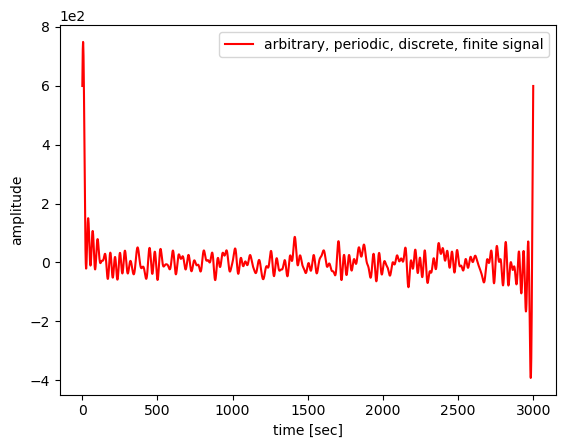

In [11]:
# Cell 3: create periodic, discrete, finite signal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# number of samples (intial value: 3000)
samp = 3000
# sample rate (initial value: 1)
dt = 1
# period
T = 1.0 / dt
length = samp * dt
# number of coefficients (initial value: 100)
N = 100
# weighting factors for coefficients (selected randomly)
a0 = np.random.rand(1)
a = np.random.randint(1, high=11, size=N)
b = np.random.randint(1, high=11, size=N)

t = np.linspace(0, length, samp)             # time axis
sig = series_real_coeff(a0, a, b, t, T)

# plotting
plt.plot(t, sig, 'r', label='arbitrary, periodic, discrete, finite signal')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
plt.xlabel('time [sec]')
plt.ylabel('amplitude')
plt.legend()
plt.show()

In [19]:
# Cell 4: determine the first 'n' coefficients of the function using the code function of cell 1
T = 1        # period
n = 10        # number of coeffs to reconstruct
a0, a, b = fourier_series_coeff(sig, T, n)
a_ = a.astype(int)
b_ = b.astype(int)
print('coefficient a0 = ', int(a0))
print('array coefficients ak =', a_)
print('array coefficients bk =', b_)

coefficient a0 =  140
array coefficients ak = [ 736  600  737 1150 1150 1418  742  738  749 1295]
array coefficients bk = [ 137  275  140 1093  819  273 1096  415 1370 1359]


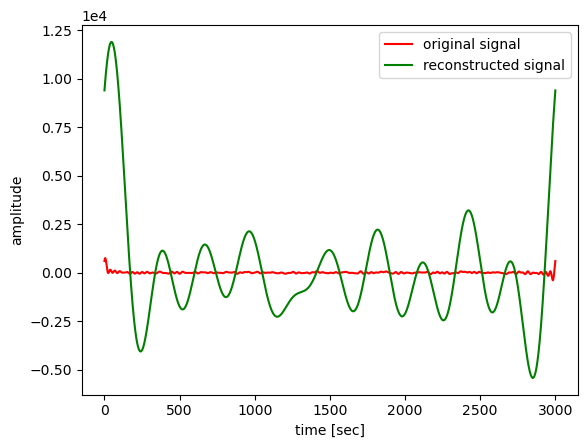

In [20]:
# Cell 5: reconstruct the function using the code in cell 2
g = series_real_coeff(a0, a, b, t, dt)

# plotting
plt.plot(t, sig, 'r', label='original signal')          # NOT normalized 
plt.plot(t, g, 'g', label='reconstructed signal')
#plt.plot(t, sig/max(sig), 'r', label='original signal')  # normalized 
#plt.plot(t, g/max(g), 'g', label='reconstructed signal')

plt.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
plt.xlabel('time [sec]')
plt.ylabel('amplitude')
plt.legend()
plt.show()

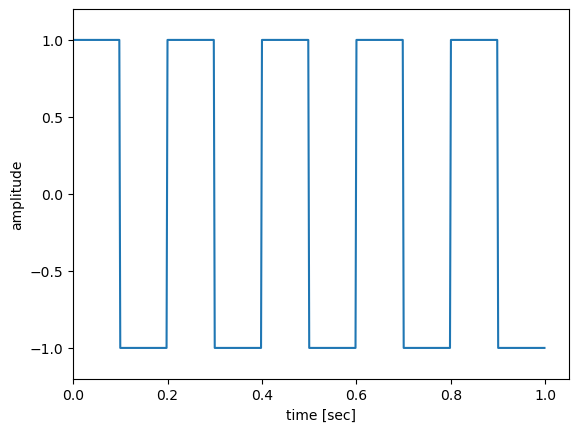

In [22]:
# Cell 6: define a square wave of 5 Hz
from scipy import signal
freq = 5.
npts = 500
dt_ = 0.002
length = npts * dt_
t_ = np.linspace(0, length, npts, endpoint=False)
square = signal.square(2 * np.pi * freq * t_)

plt.plot(t_, square)
plt.xlabel('time [sec]')
plt.ylabel('amplitude')
plt.xlim(0, 1.05)
plt.ylim(-1.2, 1.2)
plt.show()

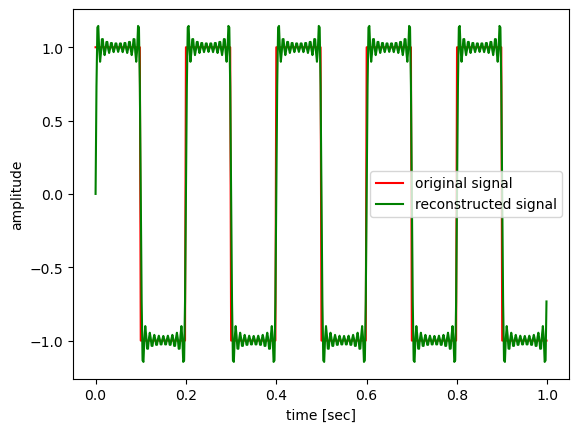

In [27]:
# Cell 7: reconstruct signal using convergence criterion
n = 20                 # number of coefficients (initial: 5)
T_ = 1/freq           # period of signal

# determine coefficients
a0 = 0
a = []
b = []
for i in range(1,n):
    if (i%2 != 0):
        a_ = 4/(np.pi*i)
    else:
        a_ = 0
    a.append(a_)
    b_ = (2*np.pi*i)/T_
    b.append(b_)

# reconstruct signal
g = np.ones_like(t_) * a0
for k, (ak, bk) in enumerate(zip(a, b)):
    g += ak * np.sin(bk*t_)

# plotting
plt.plot(t_, square, 'r', label='original signal')                  
plt.plot(t_, g, 'g', label='reconstructed signal')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
plt.xlabel('time [sec]')
plt.ylabel('amplitude')
#plt.ylim(-1.1,1.1)
plt.legend()
plt.show()